# **Sesión 3: Análisis y Adquisición de datos de ChEMBL (API)**

A continuación, se presentan una serie de ejercicios independientes orientados a la consulta y análisis de información en la base de datos ChEMBL. Cada punto debe abordarse de manera autónoma, aplicando los recursos y estrategias adecuadas de la API de ChEMBL.  
Una vez completados, adjunta una captura de pantalla que demuestre el cumplimiento del ejercicio con su respectivo resultado.


**1. Consulta de información molecular**

A partir del nombre "ibuprofeno", obtén la información detallada de la molécula, asegurando incluir las siguientes columnas:

🔹	Nombre preferido
🔹	ID de ChEMBL
🔹	Sinónimos registrados
🔹	Fase clínica máxima
🔹	Clasificación ATC
🔹	Información estructural
🔹	Propiedades moleculares


In [ ]:
# Installing necessary libraries

%pip install tqdm
from IPython.utils import io #Proporciona herramientas para capturar y suprimir las salidas (outputs).
import tqdm.notebook #Proporciona una barra de progreso interactiva para el notebook Jupyter.
import os, os.path, sys, random, subprocess #Proporciona funciones para interactuar con el sistema operativo, como manipular archivos y directorios.
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
        pbar.update(30)
        %pip install matplotlib, seaborn, pandas, bs4
        import requests # Web Scrapping
        from bs4 import BeautifulSoup # Web Scrapping

        '''Librerías gráficas'''
        import matplotlib.pyplot as plt
        from IPython.display import display, SVG, HTML #Muestra gráficos SVG en el notebook
        import seaborn as sns #Librería para visualización de datos estadísticos basada en matplotlib.
        %pip install rdkit
        from rdkit import Chem
        from rdkit.Chem import Draw
        pbar.update(40)
        '''Librerias de herramientas primarias:'''
        import pandas as pd #Librería para manipulación y análisis de datos tabulares en Python.
        %config Completer.use_jedi = False #Jupyter
        import json #Proporciona herramientas para trabajar con datos en formato JSON.
        pbar.update(30)
        '''Busqueda en ChEMBL (API)'''
        %pip install chembl_webresource_client
        from chembl_webresource_client.new_client import new_client #Proporciona un nuevo cliente para acceder a la API de ChEMBL.
        from chembl_webresource_client.utils import utils #Proporciona funciones de utilidad para trabajar con la API de ChEMBL.
        from pathlib import Path #Proporciona manipulación de rutas de archivos como clases independientes.

Note: you may need to restart the kernel to use updated packages.


  0%|          | 0/100 [00:00<?, ?it/s]

In [34]:
# Convention
search = new_client

# Required information for the molecule of interest (ibuprofen)
columns = ['pref_name', 'molecule_chembl_id', 'molecule_synonyms', 'max_phase', 'atc_classifications', 'molecule_structures', 'molecule_properties']

# Query the ChEMBL database for ibuprofen using the specified columns
ibuprofen = search.molecule.filter(pref_name__iexact="ibuprofen").only(columns)

# Convert the retrieved data into a DataFrame for better visualization
ibuprofen_df = pd.DataFrame(ibuprofen)
ibuprofen_df

,atc_classifications,max_phase,molecule_chembl_id,molecule_properties,molecule_structures,molecule_synonyms,pref_name
0,"[G02CC01, M01AE51, M02AA13, R02AX02, C01EB16, ...",4.0,CHEMBL521,"{'alogp': '3.07', 'aromatic_rings': 1, 'full_m...",{'canonical_smiles': 'CC(C)Cc1ccc(C(C)C(=O)O)c...,"[{'molecule_synonym': 'Aches-n-pain', 'syn_typ...",IBUPROFEN


🔽 Información del Ibuprofeno en ChEMBL🔽

🔶 Nombre preferido: IBUPROFEN

🔶 ID de ChEMBL: CHEMBL521

🔶 Algunos de los sinónimos de ibuprofeno son: Cuprofen for child, Nurofen solb, Infant's advil, Ibuprofen, Isisfen

🔶 Fase clínica máxima: 4.0

🔶 Clasificación ATC: ['G02CC01', 'M01AE51', 'M02AA13', 'R02AX02', 'C01EB16', 'M01AE01']

🔶 Información estructural del ibuprofeno: SMILES: CC(C)Cc1ccc(C(C)C(=O)O)cc1, InChI: InChI=1S/C13H18O2/c1-9(2)8-11-4-6-12(7-5-11)10(3)13(14)15/h4-7,9-10H,8H2,1-3H3,(H,14,15), InChIKey: HEFNNWSXXWATRW-UHFFFAOYSA-N

🔶 Propiedades moleculares: {'alogp': '3.07', 'aromatic_rings': 1, 'full_molformula': 'C13H18O2', 'full_mwt': '206.28', 'hba': 1, 'hbd': 1, 'heavy_atoms': 15, 'mw_freebase': '206.28', 'np_likeness_score': '0.14', 'num_ro5_violations': 0, 'psa': '37.30', 'qed_weighted': '0.82', 'ro3_pass': 'N', 'rtb': 4}

🧪 Visualización de la estructura 2D del ibuprofeno 


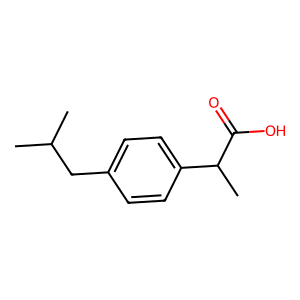

In [ ]:
# Retrival from the dataset
print("🔽 Información del Ibuprofeno en ChEMBL🔽\n")
print(f"🔶 Nombre preferido: {ibuprofen_df['pref_name'][0]}\n")
print(f"🔶 ID de ChEMBL: {ibuprofen_df['molecule_chembl_id'][0]}\n")

# To extract just the molecule synonyms from the 'molecule_synonyms' column and create a list of synonyms for ibuprofen
ibuprofen_synonyms = [d['molecule_synonym'] for d in ibuprofen_df['molecule_synonyms'].iloc[0]]
# print(f"🔶 La lista completa de sinónimos de ibuprofeno es: {ibuprofen_synonyms}")

# To get 5 random synonyms from the list of ibuprofen synonyms
random_synonyms = random.sample(ibuprofen_synonyms, 5)
print(f"🔶 Algunos de los sinónimos de ibuprofeno son: {', '.join(random_synonyms)}\n")

print(f"🔶 Fase clínica máxima: {ibuprofen_df['max_phase'][0]}\n")
print(f"🔶 Clasificación ATC: {ibuprofen_df['atc_classifications'][0]}\n")

# To view the complete structural information of ibuprofen, including the molfile
#print(f"🔶 Información estructural del ibuprofeno: {ibuprofen_df['molecule_structures'][0]}\n")

# Improve the print of the molecular structure of ibuprofen omitting the molfile
ibuprofen_smiles = ibuprofen_df['molecule_structures'][0]['canonical_smiles']
ibuprofen_inchi = ibuprofen_df['molecule_structures'][0]['standard_inchi']
ibuprofen_inchikey = ibuprofen_df['molecule_structures'][0]['standard_inchi_key']
print(f"🔶 Información estructural del ibuprofeno: SMILES: {ibuprofen_smiles}, InChI: {ibuprofen_inchi}, InChIKey: {ibuprofen_inchikey}\n")

print(f"🔶 Propiedades moleculares: {ibuprofen_df['molecule_properties'][0]}")

# SMILES to mol
ibuprofen_smiles = ibuprofen_df['molecule_structures'][0]['canonical_smiles']
ibuprofen_molecule = Chem.MolFromSmiles(ibuprofen_smiles)

# Draw the 2D structure of ibuprofen
ibuprofen_image = Draw.MolToImage(ibuprofen_molecule)
# Display the image of ibuprofen
print("\n🧪 Visualización de la estructura 2D del ibuprofeno ")
ibuprofen_image

**2. Búsqueda de subestructuras**

Determina cuántas moléculas en ChEMBL contienen las siguientes subestructuras:

🔹 Quinazolina → (SMILES: C1=CC=C2C(=C1)C=NC=N2)

🔹 Quinolina → (Dibuja la molécula y obtén el SMILES)


**Quinazolina**

🔶 El número de moléculas en ChEMBL que contienen la subestructura quinazolina es: 30000

🧪 Algunas moléculas que contienen la subestructura quinazolina en ChEMBL:
CHEMBL ID: CHEMBL414196, SMILES: COc1cc2nc(N3CCN(C(=O)C4CC4c4ccccc4)CC3)nc(N)c2cc1OC
CHEMBL ID: CHEMBL112998, SMILES: COc1cc2nc(N3CCN(S(=O)(=O)c4cccs4)CC3)nc(N)c2cc1OC
CHEMBL ID: CHEMBL266223, SMILES: COC(=O)/C=C/C(=O)Nc1ccc(CCCCC(=O)N2CCN(c3nc(N)c4cc(OC)c(OC)cc4n3)CC2)cc1
CHEMBL ID: CHEMBL263077, SMILES: COc1cc2nc(N3CCN(C(=O)CCc4ccccc4)CC3)nc(N)c2cc1OC
CHEMBL ID: CHEMBL6347, SMILES: COc1ccc(/C=C/C(=O)N2CCN(c3nc(N)c4cc(OC)c(OC)cc4n3)CC2)cc1


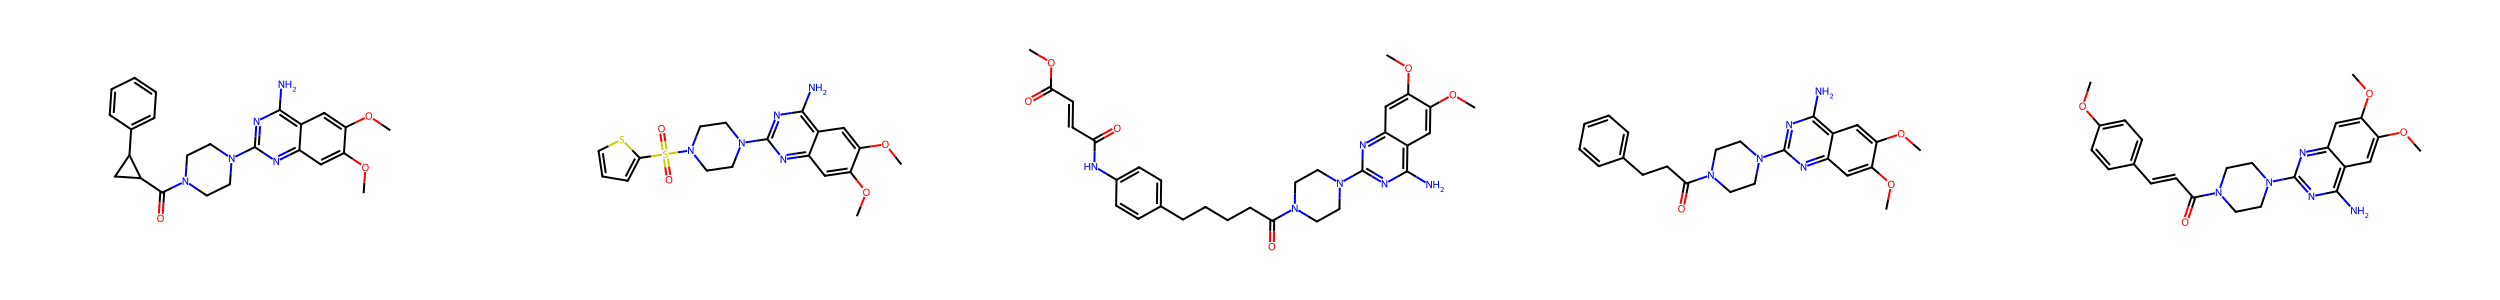

In [98]:
quinazoline_smiles = "C1=CC=C2C(=C1)C=NC=N2"

# Substructure search
quinazoline_susbst = search.substructure.filter(smiles=quinazoline_smiles).only(['molecule_chembl_id', 'molecule_structures'])
print(f"🔶 El número de moléculas en ChEMBL que contienen la subestructura quinazolina es: {len(quinazoline_susbst)}\n")

# ChemBL id and smiles of some molecules that contain the quinazoline substructure
print("🧪 Algunas moléculas que contienen la subestructura quinazolina en ChEMBL:")
for mol in quinazoline_susbst[:5]:  # Show first 5 molecules
    print(f"CHEMBL ID: {mol['molecule_chembl_id']}, SMILES: {mol['molecule_structures']['canonical_smiles']}")
# Vizualization in the same graphic of the 2D structure of the molecules that contains the quinazoline substructure
mols_2d = []
for mol in quinazoline_susbst[:5]: 
    mol_smiles = mol['molecule_structures']['canonical_smiles']
    m = Chem.MolFromSmiles(mol_smiles)
    if m is not None:
        mols_2d.append(m)
    else:
        print(f"Error generating 2D structure for molecule {mol['molecule_chembl_id']}")

# Display all 2D structures in one graphic
if mols_2d:
    img = Draw.MolsToGridImage(mols_2d, molsPerRow=5, subImgSize=(500, 300))
    display(img)

**Quinolina**

🔷 El número de moléculas en ChEMBL que contienen la subestructura quinolina es: 30000

🧪 Algunas moléculas que contienen la subestructura quinolina en ChEMBL:
CHEMBL ID: CHEMBL268556, SMILES: c1cc2cc(c1)-c1cccc(c1)C[n+]1ccc(c3ccccc31)NCCCCCCCCCCNc1cc[n+](c3ccccc13)C2
CHEMBL ID: CHEMBL6266, SMILES: c1ccc2c(c1)c1cc[n+]2Cc2ccc(cc2)-c2ccc(cc2)C[n+]2ccc(c3ccccc32)NCCCCCCCCCCN1
CHEMBL ID: CHEMBL6354, SMILES: Nc1cc[n+](Cc2cccc(-c3cccc(C[n+]4ccc(N)c5ccccc54)c3)c2)c2ccccc12
CHEMBL ID: CHEMBL429017, SMILES: Nc1cc[n+](Cc2ccc(CCc3ccc(C[n+]4ccc(N)c5ccccc54)cc3)cc2)c2ccccc12
CHEMBL ID: CHEMBL6361, SMILES: Nc1cc[n+](Cc2ccc(/C=C\c3ccc(C[n+]4ccc(N)c5ccccc54)cc3)cc2)c2ccccc12


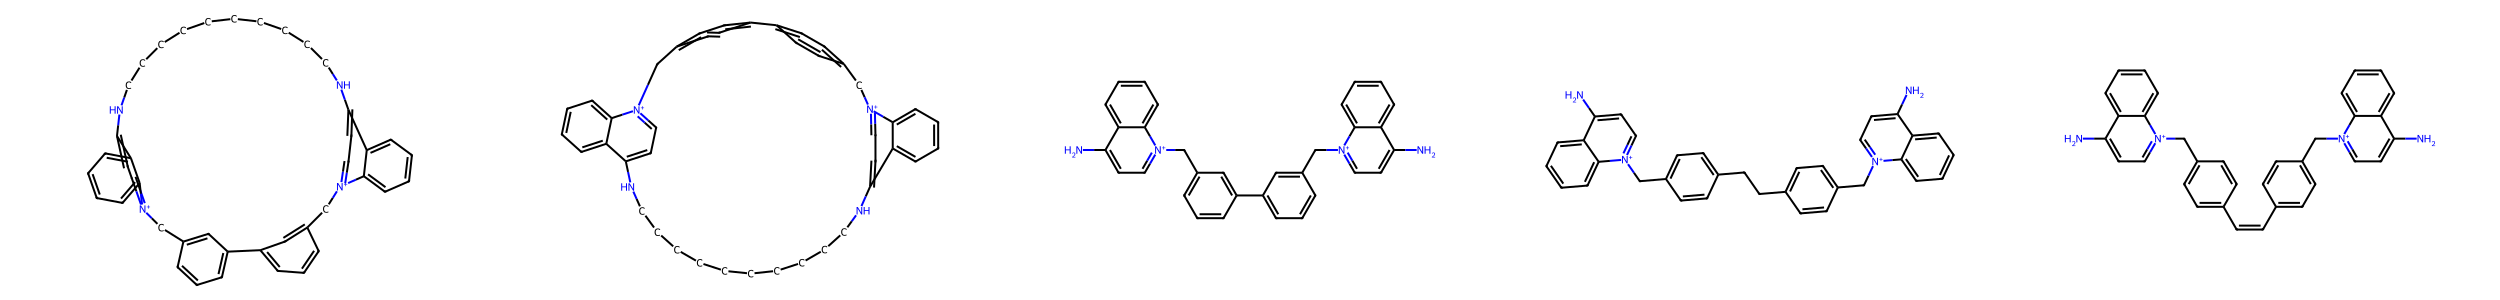

In [100]:
quinoline_smiles = "C1=CC2=CC=CN=C2C=C1" # From MarvinSketch
quinoline_subst = search.substructure.filter(smiles=quinoline_smiles).only(['molecule_chembl_id', 'molecule_structures'])
print(f"🔷 El número de moléculas en ChEMBL que contienen la subestructura quinolina es: {len(quinoline_subst)}\n")

# ChemBL id and smiles of some molecules that contain the quinoline substructure
print("🧪 Algunas moléculas que contienen la subestructura quinolina en ChEMBL:")
for mol in quinoline_subst[:5]:  # Show first 5 molecules
    print(f"CHEMBL ID: {mol['molecule_chembl_id']}, SMILES: {mol['molecule_structures']['canonical_smiles']}")

# Vizualization in the same graphic of the 2D structure of the molecules that contains the quinoline substructure
mols_2d = []
for mol in quinoline_subst[:5]: 
    mol_smiles = mol['molecule_structures']['canonical_smiles']
    m = Chem.MolFromSmiles(mol_smiles)
    if m is not None:
        mols_2d.append(m)
    else:
        print(f"Error generating 2D structure for molecule {mol['molecule_chembl_id']}")

# Display all 2D structures in one graphic
if mols_2d:
    img = Draw.MolsToGridImage(mols_2d, molsPerRow=5, subImgSize=(500, 300))
    display(img)

**3. Análisis de similitud molecular**

🔹 Identifica cuántas moléculas presentan más del 75% de similitud estructural con aciclovir.

🔹 Determina cuál(es) molécula(s) presentan el mayor grado de similitud con aciclovir (al menos 3) 


**4. Identificación de fármacos en fases clínicas avanzadas**

🔹 Obtén el número total de moléculas en fase clínica 3 en toda la base de datos de ChEMBL.

🔹 Realiza el mismo análisis para las moléculas en fase clínica 2.


**5. Búsqueda de inhibidores de la proteasa principal del SARS-CoV-2**

Si se desea identificar todas las moléculas reportadas como inhibidores de la proteasa principal del SARS-CoV-2, contemplando ensayos de unión B e IC50, describe detalladamente:

🔹 ¿Qué recursos y estrategias utilizarías dentro de la API de ChEMBL?

🔹 ¿Qué pasos seguirías para recuperar y analizar esta información?


# **Ejercicio global**

Este ejercicio tiene como objetivo realizar una búsqueda estructurada en ChEMBL a partir de un blanco molecular de interés, obteniendo y procesando datos de bioactividad para generar un conjunto de moléculas depurado según criterios de propiedades farmacéuticas.


Pasos a seguir:

1️ Selección del Blanco Molecular

🔸 Escoge una proteína de interés como blanco molecular.

🔸 Consulta la base de datos UniProt y obtén el ID de UniProt correspondiente.

2️ Búsqueda de Blancos Moleculares en ChEMBL

🔸 Emplea la API de ChEMBL para obtener los targets moleculares asociados al ID de UniProt seleccionado.

🔸 Extrae los ID de ChEMBL (target_chembl_id) correspondientes.

3️ Recuperación de Datos de Bioactividad

🔸 Obtén las moléculas asociadas a los target_chembl_id obtenidos en el paso anterior.

🔸 Filtra y almacena únicamente las siguientes columnas:

🔸 molecule_chembl_id (ID de la molécula en ChEMBL)

🔸 canonical_smiles (Estructura molecular en formato SMILES)

🔸 standard_value (Valor de bioactividad)

🔸 standard_units (Unidades de medida de bioactividad)

🔸 target_chembl_id (ID del blanco molecular en ChEMBL)

🔸 target_organism (Organismo del blanco molecular)

4️ Obtención de Información Molecular

🔸 A partir de los molecule_chembl_id obtenidos, recopila información detallada de cada molécula.

🔸 Construye un DataFrame consolidado con los datos obtenidos.

5️ Aplicación de Filtros

🔸 Eliminación de duplicados: Conserva una única entrada por SMILES canónico para evitar redundancias.

🔸 Filtrado por propiedades farmacéuticas: Conserva únicamente las moléculas que no excedan más de una violación en las reglas de interés farmacéutico revisadas en clase.
